In [1]:
using Distributed
addprocs(44);

### Fitting a choice model.

First you have to include the necessary package

In [2]:
using pulse_input_DDM

In [3]:
θy = Sigmoid(10.,60.,0.05,0.)

Sigmoid{Float64}
  a: Float64 10.0
  b: Float64 60.0
  c: Float64 0.05
  d: Float64 0.0


In [4]:
θy = Softplus(10.,1.,40.)

Softplus{Float64}
  a: Float64 10.0
  c: Float64 1.0
  d: Float64 40.0


┌ Info: Recompiling stale cache file /usr/people/briandd/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


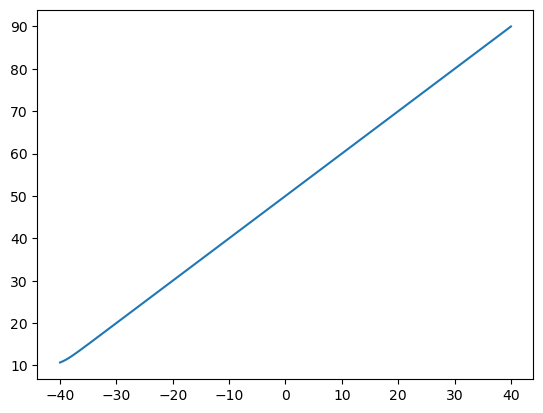

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f247410d3c8>

In [5]:
using PyPlot
plot(collect(-40.:0.1:40.), θy.(collect(-40.:0.1:40.), 0.))

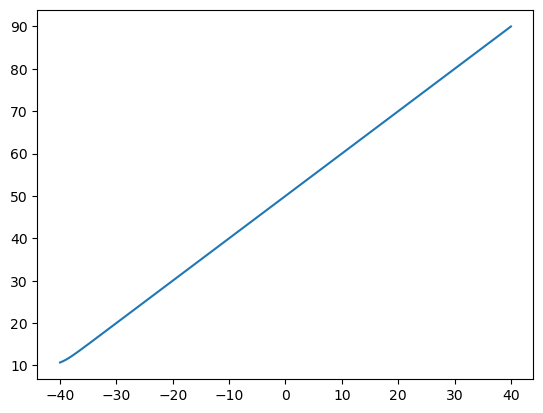

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f24374af5c0>

In [6]:
using PyPlot
plot(collect(-40.:0.1:40.), θy.(collect(-40.:0.1:40.), 0.))

### Geneerate some data
Blah blah blah

In [7]:
f, ncells, ntrials, nparams = "Sigmoid", [5,4], [300,400], 4

θ_syn = θneural(θz = θz(σ2_i = 0.5, B = 40., λ = -0.5, σ2_a = 50., σ2_s = 0.1,
    ϕ = 0.6, τ_ϕ =  0.02),
    θy=[[Sigmoid(10.,60.,0.05*rand([-1,1]),0.) for n in 1:N] for N in ncells], ncells=ncells,
    nparams=nparams, f=f)

θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Sigmoid{Float64},1}}((2,))
  ncells: Array{Int64}((2,)) [5, 4]
  nparams: Int64 4
  f: String "Sigmoid"


In [8]:
f, ncells, ntrials, nparams = "Softplus", [5,4], [300,400], 3

θ_syn = θneural(θz = θz(σ2_i = 0.5, B = 40., λ = -0.5, σ2_a = 50., σ2_s = 0.1,
    ϕ = 0.6, τ_ϕ =  0.02),
    θy=[[Softplus(10., rand([-1.,1.]),0.) for n in 1:N] for N in ncells], ncells=ncells,
    nparams=nparams, f=f)

θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Softplus{Float64},1}}((2,))
  ncells: Array{Int64}((2,)) [5, 4]
  nparams: Int64 3
  f: String "Softplus"


In [9]:
f, ncells, ntrials, nparams = "Softplus", [1], [10_000], 3

θ_syn = θneural(θz = θz(σ2_i = 1e-2, B = 40., λ = -1., σ2_a = 50., σ2_s = 1e-2,
    ϕ = 1. -eps(), τ_ϕ =  0.02),
    θy=[[Softplus(10., 10., 10.) for n in 1:N] for N in ncells], ncells=ncells,
    nparams=nparams, f=f)

θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Softplus{Float64},1}}((1,))
  ncells: Array{Int64}((1,)) [1]
  nparams: Int64 3
  f: String "Softplus"


In [30]:
data = synthetic_data(θ_syn, ntrials; centered=false);

In [31]:
n = 103

103

In [32]:
loglikelihood(θ_syn, data, n)

-493263.96712046774

In [26]:
data[1][1].input_data

pulse_input_DDM.neuralinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}
  clicks: pulse_input_DDM.clicks
  binned_clicks: pulse_input_DDM.binned_clicks
  λ0: Array{Array{Float64,1}}((1,))
  dt: Float64 0.01
  centered: Bool true


In [16]:
θy0 = vcat(vcat(initialize_θy.(data, f)...)...)

θy0

3-element Array{Float64,1}:
 9.868493150684932 
 4.1611487103704405
 0.0               

In [17]:
options0 = neuraloptions(ncells=ncells,
    fit=vcat(falses(dimz), trues(sum(ncells)*nparams)),
    x0=vcat([0., 30., 0. + eps(), 0., 0., 1. - eps(), 0.008], θy0),
    nparams=nparams, f=f, 
    lb = vcat([0., 8., -5., 0., 0., 0.01, 0.005], repeat([0.,-10.,-10.,], sum(ncells))), 
    ub = vcat([2., 30., 5., 100., 2.5, 1.2, 1.], repeat([100.,10.,10.], sum(ncells))))

neuraloptions
  ncells: Array{Int64}((1,)) [1]
  nparams: Int64 3
  f: String "Softplus"
  fit: Array{Bool}((10,)) Bool[0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
  lb: Array{Float64}((10,)) [0.0, 8.0, -5.0, 0.0, 0.0, 0.01, 0.005, 0.0, -10.0, -10.0]
  ub: Array{Float64}((10,)) [2.0, 30.0, 5.0, 100.0, 2.5, 1.2, 1.0, 100.0, 10.0, 10.0]
  x0: Array{Float64}((10,)) [0.0, 30.0, 2.220446049250313e-16, 0.0, 0.0, 0.9999999999999998, 0.008, 9.868493150684932, 4.1611487103704405, 0.0]


### Optimize stuff
Blah blah blah

In [18]:
model = optimize(data, options0)

Fminbox
-------
Initial mu = 76.8591

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 76.8591

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.028419e+06     2.840945e+04
 * time: 4.601478576660156e-5
     1     9.979438e+05     2.504234e+04
 * time: 0.856982946395874
     2     9.745756e+05     2.263427e+04
 * time: 1.5163750648498535
     3     9.544536e+05     2.067304e+04
 * time: 2.0615010261535645
     4     9.344140e+05     1.881528e+04
 * time: 2.604465961456299
     5     9.211516e+05     1.763576e+04
 * time: 3.7332401275634766
     6     9.071323e+05     1.642870e+04
 * time: 4.333832025527954
     7     8.979307e+05     1.565860e+04
 * time: 4.908924102783203
     8     8.882255e+05     1.486328e+04
 * time: 5.509658098220825
     9     8.813918e+05     1.431444e+04
 * time: 6.083688020706177
    10     8.740911e+05     1.373654e+04
 * time: 6.657217979431152
    11     8.684795e+05     1.329932e+0

neuralDDM{θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((1,))


In [18]:
fit=vcat(falses(dimz-2), falses(2), trues(sum(ncells)*nparams))
#x0=vcat([0.5, 8., -2., 10., 1., 0.4, 0.008], pulse_input_DDM.flatten(model.θ)[dimz+1:end])
x0=vcat([θ_syn.θz.σ2_i, θ_syn.θz.B, θ_syn.θz.λ, θ_syn.θz.σ2_a, θ_syn.θz.σ2_s, θ_syn.θz.ϕ, θ_syn.θz.τ_ϕ], 
    pulse_input_DDM.flatten(model.θ)[dimz+1:end]);

In [8]:
pulse_input_DDM.flatten(θ_syn)

10-element Array{Float64,1}:
  0.01              
 40.0               
 -1.0               
 50.0               
  0.01              
  0.9999999999999998
  0.02              
 10.0               
 10.0               
 10.0               

In [33]:
fit=vcat(falses(2),trues(1),falses(4), falses(1), trues(1), falses(1))
#x0=vcat([0.5, 8., -2., 10., 1., 0.4, 0.008], pulse_input_DDM.flatten(model.θ)[dimz+1:end])
x0=pulse_input_DDM.flatten(θ_syn);

In [34]:
options = neuraloptions(ncells=ncells, x0=x0, fit=fit, nparams=nparams, f=f, 
    lb = vcat([0., 8., -5., 0.,   0.,  0.01, 0.005], repeat([0.,-100.,-100.,], sum(ncells))), 
    ub = vcat([2., 50., 5., 100., 2.5, 1.2,  1.], repeat([100.,100.,100.], sum(ncells))))
model = optimize(data, options, n)

Fminbox
-------
Initial mu = 0.772282

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.772282

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     4.932544e+05     2.069381e+02
 * time: 4.410743713378906e-5
     1     4.932413e+05     1.233080e+02
 * time: 16.547154903411865
     2     4.932301e+05     1.059899e+02
 * time: 29.105175018310547
     3     4.932023e+05     1.001660e+01
 * time: 40.330363035202026
     4     4.932021e+05     6.649606e-01
 * time: 51.40690898895264
     5     4.932021e+05     3.968820e-02
 * time: 62.62076711654663

Exiting inner optimizer with x = [-0.8310213633444424, 9.406487681523139]
Current distance to box: 4.16898
Decreasing barrier term μ.

Fminbox iteration 2
-------------------
Calling inner optimizer with mu = 0.000772282

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     4.932117e+05     9.243662e-02
 * time: 3.2901763916015625

neuralDDM{θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}},Array{Array{neuraldata,1},1}}
  θ: θneural{θz{Float64},Array{Array{Softplus{Float64},1},1}}
  data: Array{Array{neuraldata,1}}((1,))


In [29]:
pulse_input_DDM.flatten(model.θ)

10-element Array{Float64,1}:
  0.01              
 40.0               
 -0.9627358924918562
 50.0               
  0.01              
  0.9999999999999998
  0.02              
 10.0               
  9.778879497696998 
 10.0               

In [35]:
pulse_input_DDM.flatten(model.θ)

10-element Array{Float64,1}:
  0.01              
 40.0               
 -0.8310778339064705
 50.0               
  0.01              
  0.9999999999999998
  0.02              
 10.0               
  9.406564860175386 
 10.0               

### Compute Hessian
Blah blah blah

In [22]:
# ### Compute Hessian and the confidence interavls
# Blah blah blah

H = Hessian(model, n)
CI, HPSD = CIs(H);

┌ Warning: Hessian is not positive definite. Approximated by closest PSD matrix.
│             ||ϵ||/||H|| is 3.1634665397929176
└ @ pulse_input_DDM /usr/people/briandd/Projects/pulse_input_DDM/src/base_model.jl:19


In [23]:
CI

10-element Array{Float64,1}:
 0.012932521256961121
 3.497021858319779   
 0.07636794260066583 
 6.2377864707758     
 0.06030334354772982 
 0.009331108991109465
 0.004129265702158947
 0.13748158528160712 
 0.1775739474080006  
 0.6282239304194033  

In [63]:
hcat(collect(pulse_input_DDM.flatten(model.θ)) - CI, collect(pulse_input_DDM.flatten(θ_syn)), collect(pulse_input_DDM.flatten(model.θ)) + CI)

34×3 Array{Float64,2}:
 -7.39695      0.5     8.39695  
  9.35427     40.0    70.6457   
 -1.02275     -0.5     0.0227482
 -7.30294     50.0   107.303    
 -0.952099     0.1     1.1521   
  0.314576     0.6     0.885424 
  0.00727841   0.02    0.0327216
  7.92373     10.0    10.0164   
 -1.23579     -1.0    -0.347883 
  0.123542     0.0     4.17512  
  9.0495      10.0    10.9347   
 -1.35359     -1.0    -0.402627 
 -2.15134      0.0     2.81355  
  ⋮                             
  8.62564     10.0    10.2356   
  0.394949     1.0     1.33324  
 -0.606459     0.0     3.00023  
  9.55002     10.0    11.083    
  0.409178     1.0     1.61034  
 -5.67385      0.0     1.61199  
  9.42011     10.0    10.9106   
 -1.49154     -1.0    -0.453278 
 -3.13858      0.0     1.61907  
  9.44594     10.0    11.2167   
  0.365056     1.0     1.27829  
 -2.59983      0.0     2.66292  

In [64]:
hcat(collect(pulse_input_DDM.flatten(model.θ)), collect(pulse_input_DDM.flatten(θ_syn)))

34×2 Array{Float64,2}:
  0.5         0.5 
 40.0        40.0 
 -0.5        -0.5 
 50.0        50.0 
  0.1         0.1 
  0.6         0.6 
  0.02        0.02
  8.97008    10.0 
 -0.791837   -1.0 
  2.14933     0.0 
  9.99211    10.0 
 -0.878107   -1.0 
  0.331102    0.0 
  ⋮               
  9.43063    10.0 
  0.864096    1.0 
  1.19688     0.0 
 10.3165     10.0 
  1.00976     1.0 
 -2.03093     0.0 
 10.1653     10.0 
 -0.972411   -1.0 
 -0.759752    0.0 
 10.3313     10.0 
  0.821673    1.0 
  0.0315479   0.0 

In [65]:
hcat(collect(pulse_input_DDM.flatten(model.θ)) - CI .< 
    collect(pulse_input_DDM.flatten(θ_syn)) .< 
    collect(pulse_input_DDM.flatten(model.θ)) + CI)

34×1 BitArray{2}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1